# 41. PYT. Методы визуализации данных

В этом модуле вам предстоит:

1. познакомиться с различными способами графического представления данных.
2. освоить основные методы визуализации библиотек Matplotlib и Pandas.
3. научиться настраивать диаграммы в Matplotlib для повышения их информативности.
4. освоить основные методы визуализации библиотеки Seaborn.
5. освоить базовые методы интерактивной визуализации и анимации библиотеки Plotly.
6. научиться выбирать правильные методы визуализации для конкретных задач.

#### главные причины использования визуализации:
1. 	Визуальное восприятие физиологически является для человека основным.
По данным учёных (причём не только британских!), с помощью зрения человек получает около 80 % информации. Что касается процессов запоминания, то из услышанного человек запоминает в среднем 10 %, из прочитанного — 20 %, а из увиденного — 80 %.
2. Доказано, что скорость восприятия увеличивается в 60 000 раз, если информация представлена в виде диаграмм.
3. Акцентирование внимания на важных деталях.
4. Такой способ представления информации не только делает ваш отчёт о проделанной работе эстетически привлекательным, но и помогает сделать результаты анализа понятными, интерпретируемыми, убедительными и удобными для восприятия вашими коллегами.
5. Наконец, главное для нас с вами — это то, что визуализация помогает исследователю упростить анализ большого объёма данных со сложной структурой. Визуализация является одним из основных инструментов разведывательного анализа данных — EDA (Exploratory Data Analysis) — который в больших проектах всегда предшествует построению моделей.

#### Основные типы визуализации
1. линейный график;
2. гистограмма;
3. диаграмма рассеяния;
4. коробчатая диаграмма;
5. круговая диаграмма;
6. столбчатая диаграмма;
7. тепловая карта.

## 41.3 Знакомимся с данными

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [3]:
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Итак, мы будем работать со следующими столбцами:

1. date — дата наблюдения;
2. province/state — наименование провинции/штата;
3. country — наименование страны;
4. confirmed — общее число зафиксированных случаев на указанный день;
5. deaths — общее число зафиксированных смертей на указанный день;
6. recovered — общее число выздоровлений на указанный день.

In [6]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
# выбираем часть столбцов из таблицы
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Таблица содержит следующие столбцы:

1. country — наименование страны;
2. date — дата наблюдения;
3. total_vaccinations — общее число введённых вакцин в стране на указанный день;
4. people_vaccinated — общее число привитых первых компонентом в стране на указанный день;
5. people_vaccinated_per_hundred — процент привитых первым компонентом в стране на  указанный день;
6. people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день;
7. people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день;
8. daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
9. vaccines — комбинации вакцин, используемые в стране.

#### Предобработка данных

In [7]:
""" 1. Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели 
по всем регионам. Тем самым переходим от данных по регионам к данным по странам:"""

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [8]:
""" 2. Преобразуем даты в формат datetime с помощью функции pd.to_datetime():"""

covid_data['date'] = pd.to_datetime(covid_data['date'])

In [9]:
""" 3. Создадим признак больных на данный момент (active). Для этого вычтем из общего числа
зафиксированных случаев число смертей и число выздоровевших пациентов:"""

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [10]:
""" 4. Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. 
Для этого отсортируем данные по датам, а затем по названиям стран. После этого произведём 
группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():"""

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [13]:
""" 5. В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime."""

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [18]:
""" В итоге таблица covid_data должна выглядеть так:"""
display(covid_data.head(3))
display(vaccinations_data.head(3))

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [15]:
# За какой период представлены данные в таблице covid_data?
covid_data.date.min()
covid_data.date.max()

Timestamp('2021-05-29 00:00:00')

In [17]:
# За какой период представлены данные в таблице vaccinations_data?
vaccinations_data.date.min()
vaccinations_data.date.max()

Timestamp('2021-09-06 00:00:00')

In [22]:
"""С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам 
date и country. Тип объединения выставьте так, чтобы в результирующую таблицу попали только
наблюдения за период, вычисленный в Задании 41.3.1. То есть в результирующую таблицу должны
попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более.
Результат объединения занесите в переменную covid_df."""

covid_df = covid_data.merge(
    vaccinations_data,
    on=['date','country'],
    how='left'
)
display(covid_df.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
"""В получившейся в задании 41.3.3 таблице covid_df создайте признаки death_rate — общий 
процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент 
случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) 
и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте 
результаты на 100%."""

covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
covid_df.head(3)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [30]:
"""Какова максимальная летальность в США (United States) за весь период?"""
round(covid_df[covid_df['country']=='United States']['death_rate'].max(),2)


7.19

In [31]:
"""Чему равен средний процент выздоровевших в России (Russia)?"""
round(covid_df[covid_df['country']=='Russia']['recover_rate'].mean(),2)

67.06

In [32]:
covid_df.to_csv('data/covid_df.csv', index=False, sep=',')

Данный файл используется в ноутбуке :
Visualization_Pandas.ipynb

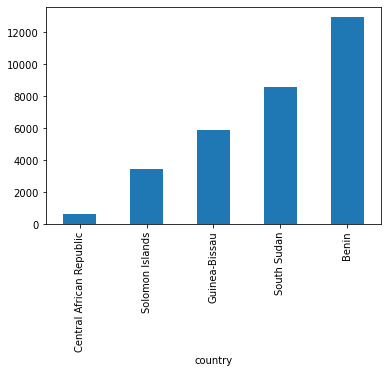

In [33]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

## ОБЩИЕ РЕКОМЕНДАЦИИ К СОЗДАНИЮ ВИЗУАЛИЗАЦИИ

	
Первое и самое главное правило — график должен быть информативным и понятным. То есть любой человек, взглянув на ваш график, должен понять, что на нём изображено.

Для этого всегда подписывайте оси графика или сам график, делайте интервалы между отметками на осях, не используйте слишком много графиков на одной координатной плоскости.

	
Одна плоскость — один вид графика. Не стоит смешивать типы визуализации, это делает результат нечитабельным.

	
Принцип минимализма: чем проще график, тем лучше — не нужно добавлять сглаживающие кривые, многочисленные подписи, лишние отметки на осях, яркие, отвлекающие внимание цвета, если это не помогает вам донести идею.

	
Если тип значений всего один, легенда не нужна.

	
Не используйте сложный дизайн там, где это не требуется. Прежде чем строить для презентации 3D-график, подумайте, можно ли обойтись без него.

	
Если у вас несколько диаграмм, используйте единую цветовую гамму.

	
Время всегда указывается по горизонтальной оси слева направо. Размещайте отметки времени так, чтобы они не сливались друг с другом (например, под углом 45 градусов).

	
При построении графиков необходимо отталкиваться от их предназначения: например, не надо строить линейный график на категориальных данных — он не предназначен для этого.

## РЕКОМЕНДАЦИИ ПО ИСПОЛЬЗОВАНИЮ ПОПУЛЯРНЫХ ТИПОВ ДИАГРАММ

### СТОЛБЧАТАЯ ДИАГРАММА
Столбчатая диаграмма (bar plot) — один из самых популярных видов графиков, однако не все исследователи используют его правильно.

Столбчатая диаграмма используется, когда необходимо сравнить какой-то показатель (количество, среднее, медиану) в зависимости от категориального признака (возможен вариант сравнения по датам). Это часто помогает понять, каково соотношение категорий, какая категория доминирующая. Всё это можно учитывать при построении модели, чтобы делать прогнозы более точными.

* Не сравнивайте больше десяти категорий друг с другом с помощью столбчатой диаграммы — вам будет сложно ориентироваться в ней, особенно если диаграмма многоуровневая.
* Если категорий слишком много, можно использовать иерархическую диаграмму или попробовать отразить диаграмму горизонтально (поменять параметры x и y местами). 
* Ещё один вариант — объединить непопулярные категории в общую категорию «другие».
* Начало точки отсчёта для значений показателя всегда 0.
* Если у вас есть значения меньше 0, используйте горизонтальную столбчатую диаграмму.

### ЛИНЕЙНЫЙ ГРАФИК
Линейный график (linear plot) отлично подходит, если набор данных непрерывен (как мы уже видели раньше, обычно это временной ряд). График используется для определения тенденций во временном ряду и сравнения нескольких рядов между собой.

* Не используйте график, если набор данных дискретный (менее 20 наблюдений) — в таком случае лучше воспользуйтесь столбчатой диаграммой.
* Время всегда отображается по оси абсцисс и разбивается на равные интервалы.
* Если даты сливаются, используйте наклон в 45 градусов.
* Не используйте график для сравнения рядов, если их больше 7-10 — график станет нечитабельным. Попробуйте уменьшить число категорий.

### ГИСТОГРАММА
Гистограммы (histogram) часто применяются для разведывательного анализа данных (EDA), так как они дают информацию о распределении признака. С их помощью можно сразу определить диапазон изменения признака, его модальное значение (пик гистограммы), а также найти «пеньки», которые выбиваются от непрерывного распределения гистограммы, — аномалии.

* Не стоит строить гистограмму, если наблюдений мало — распределение окажется далёким от действительного и вы просто сделаете ложные выводы. По статистике, для того, чтобы гистограмма хоть как-то оценивала истинное распределение, нужно как минимум 30 наблюдений (на практике нужно хотя бы 100).
* Попробуйте (ради эксперимента) построить пять-семь гистограмм на одном графике для их сравнения по категориям (например, страны). На практике так делать не нужно. Для сравнения параметров распределений по категориям предназначена коробчатая диаграмма (boxplot).
* Если вы всё же хотите сравнить гистограммы между собой, предварительно обязательно приведите признаки к одной шкале (мы делали это, когда сравнивали ежедневную заболеваемость коронавирусом в процентах от населения страны). Если этого не сделать, распределения окажутся несопоставимыми.

### ДИАГРАММА РАССЕЯНИЯ
Диаграмма рассеяния (scatter plot) и её производные — kdeplot (диаграмма плотностей) и bubble plot (пузырьковая диаграмма) — предназначены для выявления взаимосвязи между двумя (или в случае 3D — тремя) признаками.

Можно добавлять в график расцветку по одному категориальному признаку, а размер точек — по другому. Итого мы сможем наблюдать взаимосвязь нескольких признаков (до пяти).

* Не используйте диаграммы рассеяния на маленьком наборе данных. Здесь ситуация та же, что и с гистограммами.
* Не стоит использовать расцветку и размер точек для признаков с большим числом уникальных категорий.
* В случае если вы не видите зависимостей в данных, попробуйте использовать логарифмическую шкалу по оси абсцисс (по оси абсцисс и ординат в случае 3D-графика). Во всех библиотеках в методе есть параметр log, значение которого нужно установить на True.

**Почему логарифмическая шкала?**

Ответ, конечно же, кроется в математике. Если говорить, не вдаваясь в подробности, функция логарифма, во-первых, отбрасывает отрицательные значения, а во-вторых, «приземляет» более высокие значения — зависимость становится более гладкой, и её становится легче просматривать. При этом логарифмирование не искажает исходную зависимость: то есть если на исходных данных был тренд роста признака А от признака Б, то на логарифмированных данных этот тренд сохранится.

### КРУГОВАЯ ДИАГРАММА
Круговая диаграмма (pie chart) показывает структуру признака, то есть процентную долю каждой из частей признака. 

Вы можете столкнуться с ней, например, когда захотите отобразить соотношение классов в данных или вклад отдельных компонентов в общую прибыль.

* Сумма значений в круге всегда должна равняться единице, то есть всегда должно быть целое и его части (например, отношение числа заболевших вирусом по странам к общему количеству населения).
* С помощью круговой диаграммы нельзя сравнить средний чек в ресторанах — эти средние не являются частью единого целого. Однако можно сравнить число сотрудников в этих ресторанах, так как они являются частью одной совокупности.
* Не визуализируйте секторы, близкие к 0, — их невозможно сравнить друг с другом.
* Не делайте больше 6-8 секторов — воспринимать информацию будет сложно. Если компонентов больше, выделите топ-6-8, а остальные обозначьте как «прочие».
* Всегда отображайте легенду либо подписи категорий внутри секторов.
Если важно выделить часть графика, «вытащите» его из центра.

### Итак, мы сделали следующее:

1. Изучили основные типы графиков (линейный график, гистограмму, диаграмму рассеяния, столбчатую диаграмму, коробчатую диаграмму и тепловую карту), разобрали их предназначение и научились их правильно интерпретировать.
2. Узнали о возможностях библиотек Pandas и Matplotlib для построения графиков:
    * освоили методы визуализации с помощью Pandas;
    * изучили объектно-ориентированный режим в Matplotlib;
    * научились вручную настраивать параметры отображения графика, чтобы повысить его информативность;
    * научились размещать графики на нескольких системах координат.
3. Дополнили арсенал Matplotlib продвинутой визуализацией в Seaborn.
4. Познакомились со сравнительно новой, но подающей большие надежды библиотекой для интерактивных визуализаций Plotly.
5. Рассмотрели основные подходы к правильному построению графиков и их презентации коллегам.

<iframe src="https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@%D0%A1%D1%85%D0%B5%D0%BC%D0%B0_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%B0_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8.drawio.html" width="100%" height="880"></iframe>

In [1]:
from IPython.display import Image

![Image](https://viewer.diagrams.net/#P%7B%22client%22%3A1%2C%22target%22%3A%22blank%22%2C%22edit%22%3A%22_blank%22%2C%22close%22%3A1%2C%22layers%22%3A1%2C%22nav%22%3A1%2C%22highlight%22%3A%220000ff%22%7D)